# Neural Network Layers and Ops

In this session we will focus on understanding various tensor operations, NN layers, models and loss functions

# Import Dependencies

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf

In [3]:
!nvidia-smi

Sat Feb 13 01:34:34 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    24W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
print(tf.__version__)

2.4.1


In [5]:
print(sklearn.__version__)

0.22.2.post1


# 1. Tensors & Tensor Ops

## Constants

In [6]:
t = tf.constant([[1., 2., 3.], 
                 [4., 5., 6.]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
t.dtype

tf.float32

In [ ]:
t.shape

TensorShape([2, 3])

## Variables

In [ ]:
t = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
t

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
t.dtype, t.shape

(tf.float32, TensorShape([2, 3]))

In [ ]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [ ]:
t[0,0].assign(99)
t

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[99.,  2.,  3.],
       [ 4.,  5.,  6.]], dtype=float32)>

In [ ]:
t[1].assign([10, 20, 30])
t

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[99.,  2.,  3.],
       [10., 20., 30.]], dtype=float32)>

In [ ]:
t[1] = [10, 20, 30]

TypeError: ignored

In [ ]:
t.scatter_nd_update(indices=[[0, 0], [1, 1]],
                    updates=[33., 44.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[33.,  2.,  3.],
       [10., 44., 30.]], dtype=float32)>

## Indexing

In [ ]:
t[1:, :]

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[10., 44., 30.]], dtype=float32)>

In [ ]:
t[1:, ...]

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[10., 44., 30.]], dtype=float32)>

In [ ]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 2.,  3.],
       [44., 30.]], dtype=float32)>

In [ ]:
t[..., 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 2.,  3.],
       [44., 30.]], dtype=float32)>

## Basic Ops

In [ ]:
t = t + 10
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[43., 12., 13.],
       [20., 54., 40.]], dtype=float32)>

In [ ]:
t = t + tf.Variable([[1, 2, 3]], dtype='float32')
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[44., 14., 16.],
       [21., 56., 43.]], dtype=float32)>

In [ ]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1936.,  196.,  256.],
       [ 441., 3136., 1849.]], dtype=float32)>

In [ ]:
np.square(t)

array([[1936.,  196.,  256.],
       [ 441., 3136., 1849.]], dtype=float32)

In [ ]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2388., 2396.],
       [2396., 5426.]], dtype=float32)>

## Ragged Tensors

In [ ]:
r = tf.ragged.constant([[1, 2], 
                        [3, 4, 5], 
                        [], 
                        [6]])
r

<tf.RaggedTensor [[1, 2], [3, 4, 5], [], [6]]>

In [ ]:
r[1]

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 4, 5], dtype=int32)>

In [ ]:
r2 = tf.ragged.constant([[11, 22], [], [33]])
tf.concat([r, r2], axis=0)

<tf.RaggedTensor [[1, 2], [3, 4, 5], [], [6], [11, 22], [], [33]]>

In [ ]:
r3 = tf.ragged.constant([[11, 22, 33], 
                         [44], 
                         [], 
                         [55, 66]])
tf.concat([r, r3], axis=1)

<tf.RaggedTensor [[1, 2, 11, 22, 33], [3, 4, 5, 44], [], [6, 55, 66]]>

## Sparse Tensors

In [ ]:
t = tf.SparseTensor(indices=[[0, 0], [1, 1], [2, 2]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 3])
t

In [ ]:
tf.sparse.to_dense(t)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]], dtype=float32)>

In [ ]:
t2 = t * 5
tf.sparse.to_dense(t2)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 5.,  0.,  0.],
       [ 0., 10.,  0.],
       [ 0.,  0., 15.]], dtype=float32)>

# 2. Basic Regression with Simple NN + Custom Loss Function

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

housing

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

In [ ]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [12]:
X = pd.DataFrame(housing['data'], columns=housing['feature_names'])
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
y = pd.DataFrame({'price': housing['target']})
y.head()

,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions = lr.predict(X_test_scaled)
print('R2:', r2_score(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))

R2: 0.5957702326061665
MSE: 0.5305677824766752


## 2.1: Creating a custom loss function

Create a `mse_loss(...)` function with two arguments: 
- the true labels `y_true` 
- the model predictions `y_pred` 

Make it return the mean squared error using TensorFlow operations. Note that you could write your own custom metrics in this way. 

__Tip:__ Recall that the MSE is the mean of the squares of prediction errors, which are the differences between the predictions and the labels, so you will need to use `tf.reduce_mean()` and `tf.square()` ops.

In [20]:
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

## 2.2: Create a simple 1-layer NN

Here we leverage the `Sequential` API of `tf.keras` to create a simple NN with 1 hidden layer

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation="relu", 
                          input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1),
])

In [ ]:
model.compile(loss=mse_loss, 
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=['mean_squared_error'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


## 2.3: Train the model and Test its performance

We will now train our simple NN and test its performance

```
3200 houses
32 batch size

every batch of data passed to the NN will have 32 houses

1 epoch = 3200 // 32 = 100

loss is computed after each batch of 32 houses and error\loss is backpropagated based on gradients in each layer
```

In [ ]:
model.fit(X_train_scaled, y_train, 
          epochs=30,
          batch_size=32,
          validation_split=0.1)

Epoch 1/30
407/407 [==============================] - 1s 2ms/step - loss: 2.3144 - mean_squared_error: 2.3144 - val_loss: 1.0867 - val_mean_squared_error: 1.0867
Epoch 2/30
407/407 [==============================] - 1s 2ms/step - loss: 0.8915 - mean_squared_error: 0.8915 - val_loss: 0.7776 - val_mean_squared_error: 0.7776
Epoch 3/30
407/407 [==============================] - 1s 2ms/step - loss: 0.7593 - mean_squared_error: 0.7593 - val_loss: 0.7196 - val_mean_squared_error: 0.7196
Epoch 4/30
407/407 [==============================] - 1s 2ms/step - loss: 0.7178 - mean_squared_error: 0.7178 - val_loss: 0.6881 - val_mean_squared_error: 0.6881
Epoch 5/30
407/407 [==============================] - 1s 2ms/step - loss: 0.6878 - mean_squared_error: 0.6878 - val_loss: 0.6625 - val_mean_squared_error: 0.6625
Epoch 6/30
407/407 [==============================] - 1s 2ms/step - loss: 0.6611 - mean_squared_error: 0.6611 - val_loss: 0.6412 - val_mean_squared_error: 0.6412
Epoch 7/30
407/407 [========

In [ ]:
predictions = model.predict(X_test_scaled)

In [ ]:
print('R2:', r2_score(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))

R2: 0.6389823667167998
MSE: 0.47385012331223736


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation="relu", 
                          input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1),
])

In [ ]:
model.compile(loss=mse_loss, 
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=['mean_squared_error'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,777
Trainable params: 1,777
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train_scaled, y_train, 
          epochs=30,
          batch_size=32,
          validation_split=0.1) 

Epoch 1/30
407/407 [==============================] - 1s 2ms/step - loss: 1.6648 - mean_squared_error: 1.6648 - val_loss: 0.7879 - val_mean_squared_error: 0.7879
Epoch 2/30
407/407 [==============================] - 1s 2ms/step - loss: 0.7352 - mean_squared_error: 0.7352 - val_loss: 0.6796 - val_mean_squared_error: 0.6796
Epoch 3/30
407/407 [==============================] - 1s 2ms/step - loss: 0.6742 - mean_squared_error: 0.6742 - val_loss: 0.6476 - val_mean_squared_error: 0.6476
Epoch 4/30
407/407 [==============================] - 1s 2ms/step - loss: 0.6394 - mean_squared_error: 0.6394 - val_loss: 0.6229 - val_mean_squared_error: 0.6229
Epoch 5/30
407/407 [==============================] - 1s 2ms/step - loss: 0.6128 - mean_squared_error: 0.6128 - val_loss: 0.6045 - val_mean_squared_error: 0.6045
Epoch 6/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5887 - mean_squared_error: 0.5887 - val_loss: 0.5884 - val_mean_squared_error: 0.5884
Epoch 7/30
407/407 [========

In [ ]:
predictions = model.predict(X_test_scaled)

In [ ]:
print('R2:', r2_score(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))

R2: 0.682790557546519
MSE: 0.4163501157974675


## 2.4: Activation Functions

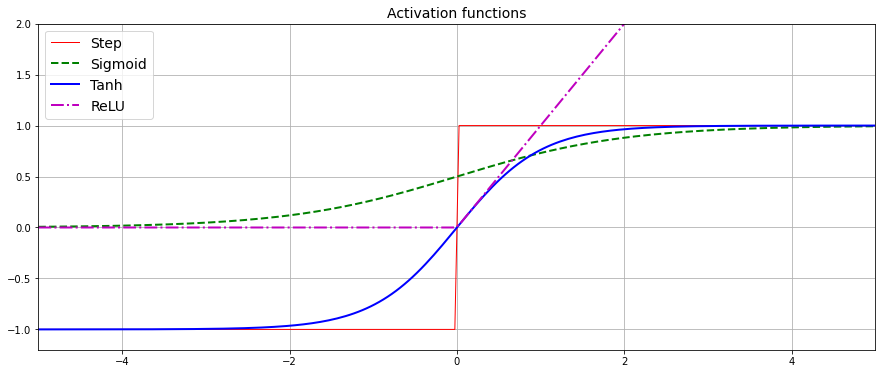

In [ ]:
z = np.linspace(-5, 5, 200)
plt.figure(figsize=(15,6))
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, tf.nn.sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, tf.nn.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, tf.nn.relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="upper left", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 2]);

(-5.0, 5.0, -1.2, 2.0)

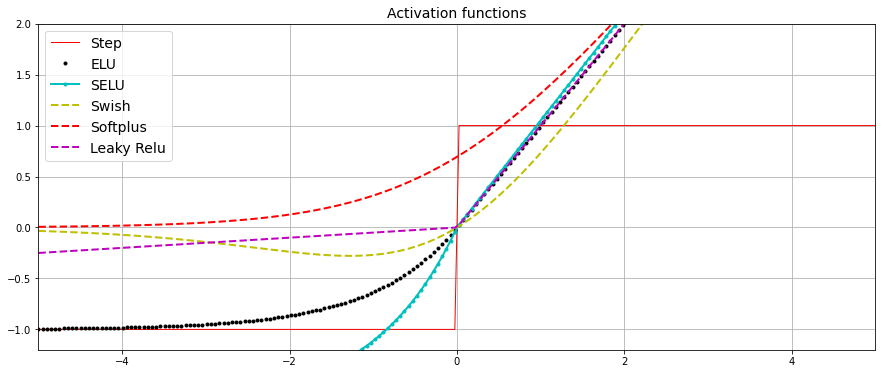

In [ ]:
z = np.linspace(-5, 5, 200)
plt.figure(figsize=(15,6))
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, tf.nn.elu(z), "k.", linewidth=2, label="ELU")
plt.plot(z, tf.nn.selu(z), "c.-", linewidth=2, label="SELU")
plt.plot(z, tf.nn.swish(z), "y--", linewidth=2, label="Swish")
plt.plot(z, tf.nn.softplus(z), "r--", linewidth=2, label="Softplus")
plt.plot(z, tf.nn.leaky_relu(z, alpha=0.05), "m--", linewidth=2, label="Leaky Relu")

plt.grid(True)
plt.legend(loc="upper left", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 2])

# 3. Custom Layers and Ops

Some layers have no weights, such as `tf.keras.layers.Flatten` or `tf.keras.layers.ReLU`. If you want to create a custom layer without any weights, the simplest option is to create a `tf.keras.layers.Lambda` layer and pass it the function to perform. 



## 3.1: Create a softplus layer

Hint: You have used the softplus function earlier which is (log(exp(X) + 1), and the `tf.nn.softplus` function can be used for the same

In [18]:
softplus_fn = tf.keras.layers.Lambda(lambda x: tf.nn.softplus(x))
softplus_fn

In [ ]:
softplus_fn([-10., -5., 0., 5., 10.])

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([4.5398901e-05, 6.7153485e-03, 6.9314718e-01, 5.0067153e+00,
       1.0000046e+01], dtype=float32)>

## 3.2: Create regression model with softplus layer

Create a regression model but add your softplus layer at the top (i.e., after the existing 1-unit dense layer). This can be useful to ensure that your model never predicts negative values.



In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation="relu", 
                          input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1),
    softplus_fn
])

model.compile(loss=mse_loss, 
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=['mean_squared_error'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0         
Total params: 1,777
Trainable params: 1,777
Non-trainable params: 0
_________________________________________________________________


## 3.3: Train and Predict

In [ ]:
history = model.fit(X_train_scaled, y_train, 
                    epochs=30,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/30
407/407 [==============================] - 1s 2ms/step - loss: 2.0329 - mean_squared_error: 2.0329 - val_loss: 0.9527 - val_mean_squared_error: 0.9527
Epoch 2/30
407/407 [==============================] - 1s 2ms/step - loss: 0.8912 - mean_squared_error: 0.8912 - val_loss: 0.7253 - val_mean_squared_error: 0.7253
Epoch 3/30
407/407 [==============================] - 1s 2ms/step - loss: 0.7200 - mean_squared_error: 0.7200 - val_loss: 0.6603 - val_mean_squared_error: 0.6603
Epoch 4/30
407/407 [==============================] - 1s 2ms/step - loss: 0.6587 - mean_squared_error: 0.6587 - val_loss: 0.6239 - val_mean_squared_error: 0.6239
Epoch 5/30
407/407 [==============================] - 1s 2ms/step - loss: 0.6242 - mean_squared_error: 0.6242 - val_loss: 0.5995 - val_mean_squared_error: 0.5995
Epoch 6/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5989 - mean_squared_error: 0.5989 - val_loss: 0.5816 - val_mean_squared_error: 0.5816
Epoch 7/30
407/407 [========

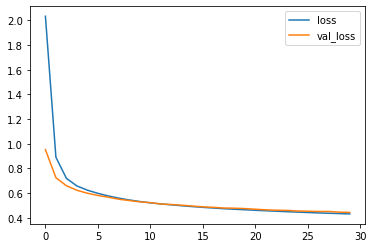

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line')

In [ ]:
predictions = model.predict(X_test_scaled)
print('R2:', r2_score(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))

R2: 0.6650092010460874
MSE: 0.4396888593756206


## 3.4: Creating a custom dense layer

Now let's create a custom layer with its own weights. 


Use the following template to create a MyDense layer that computes $\phi(\mathbf{X} \mathbf{W}) + \mathbf{b}$, 

where $\phi$ is the (optional) activation function, 

$\mathbf{X}$ is the input data, 

$\mathbf{W}$ represents the kernel (i.e., connection weights), 

and $\mathbf{b}$ represents the biases, 

then train and evaluate a model using this instead of a regular Dense layer.



In [16]:
class CustomDense(tf.keras.layers.Layer):

    def __init__(self, units, activation=None, initializer='uniform', **kwargs):
        self.units = units
        self.activation = tf.keras.layers.Activation(activation)
        self.initializer = initializer
        super(CustomDense, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(input_shape[1], self.units),
                                      initializer=self.initializer,
                                      trainable=True)
        self.biases = self.add_weight(name='bias', 
                                      shape=(self.units,),
                                      initializer='zeros',
                                      trainable=True)
        super(CustomDense, self).build(input_shape)

    def call(self, X):
        return self.activation(X @ self.kernel + self.biases)

## 3.5 Build NN Model with custom dense layer

In [21]:
model = tf.keras.models.Sequential([
    CustomDense(16, activation="relu", 
                          input_shape=(X_train.shape[1],)),
    CustomDense(32, activation="relu"),
    CustomDense(32, activation="relu"),
    CustomDense(1),
    softplus_fn
])

model.compile(loss=mse_loss, 
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=['mean_squared_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
custom_dense_8 (CustomDense) (None, 16)                144       
_________________________________________________________________
custom_dense_9 (CustomDense) (None, 32)                544       
_________________________________________________________________
custom_dense_10 (CustomDense (None, 32)                1056      
_________________________________________________________________
custom_dense_11 (CustomDense (None, 1)                 33        
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0         
Total params: 1,777
Trainable params: 1,777
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train_scaled, y_train, 
                    epochs=30,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/30
407/407 [==============================] - 2s 2ms/step - loss: 3.0793 - mean_squared_error: 3.0793 - val_loss: 2.4810 - val_mean_squared_error: 2.4810
Epoch 2/30
407/407 [==============================] - 1s 2ms/step - loss: 2.2862 - mean_squared_error: 2.2862 - val_loss: 1.8639 - val_mean_squared_error: 1.8639
Epoch 3/30
407/407 [==============================] - 1s 2ms/step - loss: 1.7079 - mean_squared_error: 1.7079 - val_loss: 1.5399 - val_mean_squared_error: 1.5399
Epoch 4/30
407/407 [==============================] - 1s 2ms/step - loss: 1.4233 - mean_squared_error: 1.4233 - val_loss: 1.4153 - val_mean_squared_error: 1.4153
Epoch 5/30
407/407 [==============================] - 1s 2ms/step - loss: 1.3991 - mean_squared_error: 1.3991 - val_loss: 1.3769 - val_mean_squared_error: 1.3769
Epoch 6/30
407/407 [==============================] - 1s 2ms/step - loss: 1.3471 - mean_squared_error: 1.3471 - val_loss: 1.3660 - val_mean_squared_error: 1.3660
Epoch 7/30
407/407 [========

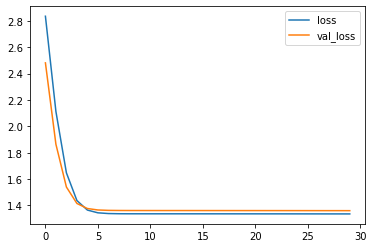

In [23]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line')

In [26]:
predictions = model.predict(X_test_scaled)
print('R2:', r2_score(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))

R2: 0.0009308488769875778
MSE: 1.3113183313285037


## 3.6: Custom NN model with custom dense and weight initializers

In [27]:
model = tf.keras.models.Sequential([
    CustomDense(16, activation="relu", initializer='glorot_uniform',
                          input_shape=(X_train.shape[1],)),
    CustomDense(32, activation="relu", initializer='glorot_uniform'),
    CustomDense(32, activation="relu", initializer='glorot_uniform'),
    CustomDense(1),
    softplus_fn
])

model.compile(loss=mse_loss, 
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=['mean_squared_error'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
custom_dense_12 (CustomDense (None, 16)                144       
_________________________________________________________________
custom_dense_13 (CustomDense (None, 32)                544       
_________________________________________________________________
custom_dense_14 (CustomDense (None, 32)                1056      
_________________________________________________________________
custom_dense_15 (CustomDense (None, 1)                 33        
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0         
Total params: 1,777
Trainable params: 1,777
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(X_train_scaled, y_train, 
                    epochs=30,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/30
407/407 [==============================] - 1s 2ms/step - loss: 2.7581 - mean_squared_error: 2.7581 - val_loss: 1.4834 - val_mean_squared_error: 1.4834
Epoch 2/30
407/407 [==============================] - 1s 2ms/step - loss: 1.3492 - mean_squared_error: 1.3492 - val_loss: 1.0399 - val_mean_squared_error: 1.0399
Epoch 3/30
407/407 [==============================] - 1s 2ms/step - loss: 1.0163 - mean_squared_error: 1.0163 - val_loss: 0.8873 - val_mean_squared_error: 0.8873
Epoch 4/30
407/407 [==============================] - 1s 2ms/step - loss: 0.8699 - mean_squared_error: 0.8699 - val_loss: 0.7972 - val_mean_squared_error: 0.7972
Epoch 5/30
407/407 [==============================] - 1s 2ms/step - loss: 0.7901 - mean_squared_error: 0.7901 - val_loss: 0.7371 - val_mean_squared_error: 0.7371
Epoch 6/30
407/407 [==============================] - 1s 2ms/step - loss: 0.7297 - mean_squared_error: 0.7297 - val_loss: 0.6934 - val_mean_squared_error: 0.6934
Epoch 7/30
407/407 [========

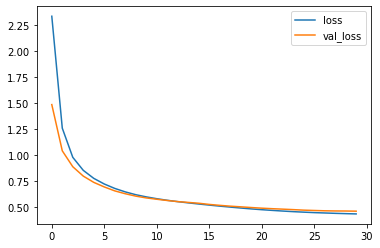

In [29]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line')

In [30]:
predictions = model.predict(X_test_scaled)
print('R2:', r2_score(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))

R2: 0.6702474810411744
MSE: 0.43281340678610997


In [41]:
model = tf.keras.models.Sequential([
    CustomDense(16, activation="relu", initializer='random_normal',
                          input_shape=(X_train.shape[1],)),
    CustomDense(32, activation="relu", initializer='random_normal'),
    CustomDense(32, activation="relu", initializer='random_normal'),
    CustomDense(1),
    softplus_fn
])

model.compile(loss=mse_loss, 
              optimizer=tf.keras.optimizers.SGD(lr=1e-3),
              metrics=['mean_squared_error'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
custom_dense_24 (CustomDense (None, 16)                144       
_________________________________________________________________
custom_dense_25 (CustomDense (None, 32)                544       
_________________________________________________________________
custom_dense_26 (CustomDense (None, 32)                1056      
_________________________________________________________________
custom_dense_27 (CustomDense (None, 1)                 33        
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0         
Total params: 1,777
Trainable params: 1,777
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(X_train_scaled, y_train, 
                    epochs=60,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/60
407/407 [==============================] - 1s 3ms/step - loss: 3.0029 - mean_squared_error: 3.0029 - val_loss: 2.4778 - val_mean_squared_error: 2.4778
Epoch 2/60
407/407 [==============================] - 1s 2ms/step - loss: 2.2250 - mean_squared_error: 2.2250 - val_loss: 1.8568 - val_mean_squared_error: 1.8568
Epoch 3/60
407/407 [==============================] - 1s 2ms/step - loss: 1.7037 - mean_squared_error: 1.7037 - val_loss: 1.5328 - val_mean_squared_error: 1.5328
Epoch 4/60
407/407 [==============================] - 1s 2ms/step - loss: 1.4727 - mean_squared_error: 1.4727 - val_loss: 1.4105 - val_mean_squared_error: 1.4105
Epoch 5/60
407/407 [==============================] - 1s 2ms/step - loss: 1.4053 - mean_squared_error: 1.4053 - val_loss: 1.3736 - val_mean_squared_error: 1.3736
Epoch 6/60
407/407 [==============================] - 1s 2ms/step - loss: 1.3080 - mean_squared_error: 1.3080 - val_loss: 1.3637 - val_mean_squared_error: 1.3637
Epoch 7/60
407/407 [========

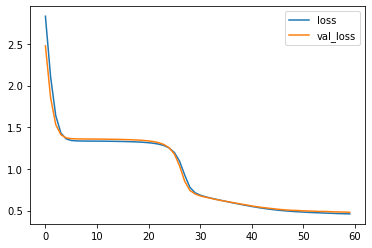

In [43]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line')

In [44]:
predictions = model.predict(X_test_scaled)
print('R2:', r2_score(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))

R2: 0.6493164194181347
MSE: 0.46028626466547323


## Different layer weight initializers

In [ ]:
[name for name in dir(tf.keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

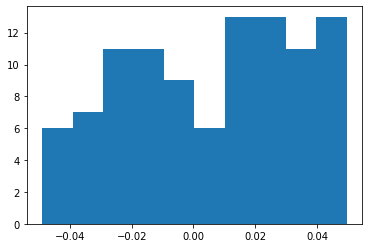

In [ ]:
input_x = np.array([[1]])
dense1 = tf.keras.layers.Dense(100, activation="relu", kernel_initializer="uniform", input_shape=(input_x.shape[0],))
y = dense1(input_x)
plt.hist(dense1.weights[0][0]);

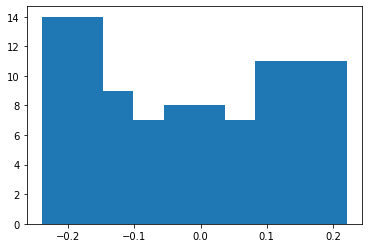

In [ ]:
input_x = np.array([[1]])
dense1 = tf.keras.layers.Dense(100, activation="relu", kernel_initializer="glorot_uniform", input_shape=(input_x.shape[0],))
y = dense1(input_x)
plt.hist(dense1.weights[0][0]);

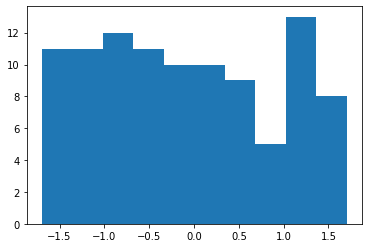

In [ ]:
input_x = np.array([[1]])
dense1 = tf.keras.layers.Dense(100, activation="relu", kernel_initializer="lecun_uniform", input_shape=(input_x.shape[0],))
y = dense1(input_x)
plt.hist(dense1.weights[0][0]);

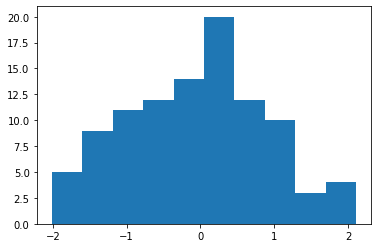

In [ ]:
input_x = np.array([[1]])
dense1 = tf.keras.layers.Dense(100, activation="relu", kernel_initializer="lecun_normal", input_shape=(input_x.shape[0],))
y = dense1(input_x)
plt.hist(dense1.weights[0][0]);

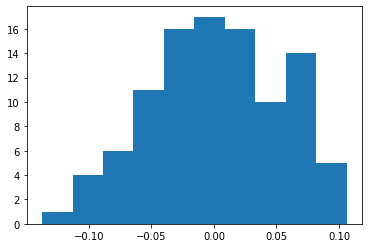

In [ ]:
input_x = np.array([[1]])
dense1 = tf.keras.layers.Dense(100, activation="relu", kernel_initializer="random_normal", input_shape=(input_x.shape[0],))
y = dense1(input_x)
plt.hist(dense1.weights[0][0]);

# 4. Gradient Descent & Custom Training Loops

## 4.1: Implement Gradient Descent manually 

Find the value of x that minimizes the following function f(x).



In [45]:
def f(x):
    return 5. * x ** 2 + 3. * x + 1.

In [46]:
f(1)

9.0

In [47]:
def approximate_diff(f, x, eps=1e-5):
    return (f(x + eps) - f(x - eps)) / (2. * eps)

In [50]:
approximate_diff(f, 1) # true derivative = 13

13.000000000040755

# 4.2: Visualize function space

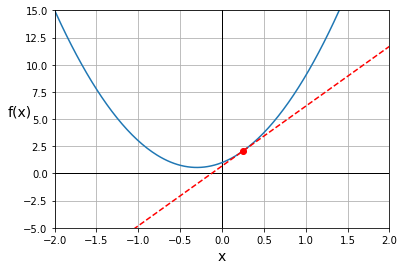

In [49]:
xs = np.linspace(-2, 2, 200)
fs = f(xs)
x0 = 0.25
df_x0 = approximate_diff(f, x0)
tangent_x0 = df_x0 * (xs - x0) + f(x0)
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot([0, 0], [-5, 15], "k-", linewidth=1)
plt.plot(xs, fs)
plt.plot(xs, tangent_x0, "r--")
plt.plot(x0, f(x0), "ro")
plt.grid(True)
plt.xlabel("x", fontsize=14)
plt.ylabel("f(x)", fontsize=14, rotation=0)
plt.axis([-2, 2, -5, 15]);

## 4.4: Gradient Tape for fast diff

In [71]:
x = tf.Variable(1.0)

with tf.GradientTape() as tape:
    z = f(x)
grads = tape.gradient(z, [x])
grads

[<tf.Tensor: shape=(), dtype=float32, numpy=13.0>]

In [73]:
x = tf.Variable(0.)

with tf.GradientTape() as tape:
    z = f(x)
grads = tape.gradient(z, [x])
grads

[<tf.Tensor: shape=(), dtype=float32, numpy=3.0>]

## 4.5: Gradient descent with Gradient Tape

In [59]:
def f(x):
    return 5 * x ** 2 + 3 * x + 1.

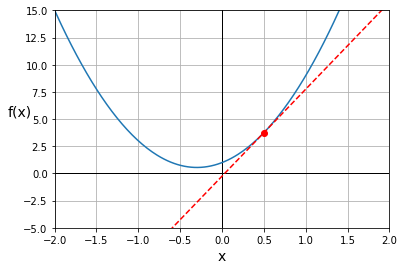

In [68]:
xs = np.linspace(-2, 2, 200)
fs = f(xs)
x0 = 0.5
df_x0 = approximate_diff(f, x0)
tangent_x0 = df_x0 * (xs - x0) + f(x0)
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot([0, 0], [-5, 15], "k-", linewidth=1)
plt.plot(xs, fs)
plt.plot(xs, tangent_x0, "r--")
plt.plot(x0, f(x0), "ro")
plt.grid(True)
plt.xlabel("x", fontsize=14)
plt.ylabel("f(x)", fontsize=14, rotation=0)
plt.axis([-2, 2, -5, 15]);

In [60]:
learning_rate = 0.1
x = tf.Variable(0.)

for i, epoch in enumerate(range(10)):
    with tf.GradientTape() as tape:
        z = f(x)
    dz_dx = tape.gradient(z, x)
    print('Epoch:', i, 'Grad:', dz_dx.numpy())
    x.assign_sub(learning_rate * dz_dx)

Epoch: 0 Grad: 3.0
Epoch: 1 Grad: -4.7683716e-07
Epoch: 2 Grad: 4.7683716e-07
Epoch: 3 Grad: -4.7683716e-07
Epoch: 4 Grad: 4.7683716e-07
Epoch: 5 Grad: -4.7683716e-07
Epoch: 6 Grad: 4.7683716e-07
Epoch: 7 Grad: -4.7683716e-07
Epoch: 8 Grad: 4.7683716e-07
Epoch: 9 Grad: -4.7683716e-07


In [61]:
x.numpy()

-0.29999995

In [62]:
f(x.numpy())

0.5500000000000114

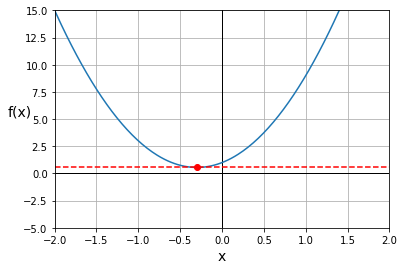

In [69]:
xs = np.linspace(-2, 2, 200)
fs = f(xs)
x0 = x.numpy()
df_x0 = approximate_diff(f, x0)
tangent_x0 = df_x0 * (xs - x0) + f(x0)
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot([0, 0], [-5, 15], "k-", linewidth=1)
plt.plot(xs, fs)
plt.plot(xs, tangent_x0, "r--")
plt.plot(x0, f(x0), "ro")
plt.grid(True)
plt.xlabel("x", fontsize=14)
plt.ylabel("f(x)", fontsize=14, rotation=0)
plt.axis([-2, 2, -5, 15]);

In [ ]:
learning_rate = 0.01
x = tf.Variable(0.)

for i, epoch in enumerate(range(150)):
    with tf.GradientTape() as tape:
        z = f(x)
    dz_dx = tape.gradient(z, x)
    print('Epoch:', i, 'Grad:', dz_dx.numpy())
    x.assign_sub(learning_rate * dz_dx)

Epoch: 0 Grad: 3.0
Epoch: 1 Grad: 2.7
Epoch: 2 Grad: 2.43
Epoch: 3 Grad: 2.187
Epoch: 4 Grad: 1.9683
Epoch: 5 Grad: 1.7714701
Epoch: 6 Grad: 1.5943232
Epoch: 7 Grad: 1.4348907
Epoch: 8 Grad: 1.2914017
Epoch: 9 Grad: 1.1622615
Epoch: 10 Grad: 1.0460356
Epoch: 11 Grad: 0.94143176
Epoch: 12 Grad: 0.8472886
Epoch: 13 Grad: 0.7625599
Epoch: 14 Grad: 0.6863041
Epoch: 15 Grad: 0.61767364
Epoch: 16 Grad: 0.5559063
Epoch: 17 Grad: 0.5003152
Epoch: 18 Grad: 0.450284
Epoch: 19 Grad: 0.4052558
Epoch: 20 Grad: 0.3647306
Epoch: 21 Grad: 0.32825756
Epoch: 22 Grad: 0.2954316
Epoch: 23 Grad: 0.26588845
Epoch: 24 Grad: 0.2392993
Epoch: 25 Grad: 0.2153697
Epoch: 26 Grad: 0.1938324
Epoch: 27 Grad: 0.17444944
Epoch: 28 Grad: 0.15700436
Epoch: 29 Grad: 0.14130402
Epoch: 30 Grad: 0.12717342
Epoch: 31 Grad: 0.11445618
Epoch: 32 Grad: 0.103010654
Epoch: 33 Grad: 0.09270978
Epoch: 34 Grad: 0.083438635
Epoch: 35 Grad: 0.07509494
Epoch: 36 Grad: 0.06758523
Epoch: 37 Grad: 0.06082678
Epoch: 38 Grad: 0.054744005
Ep

In [ ]:
x.numpy()

-0.29999983

In [ ]:
f(x.numpy())

-1.4499999999998607

In [ ]:
x = tf.Variable(0.)
optimizer = tf.keras.optimizers.SGD(lr=0.01)

for iteration in range(150):
    with tf.GradientTape() as tape:
        z = f(x)
    dz_dx = tape.gradient(z, x)
    print('Epoch:', i, 'Grad:', dz_dx.numpy())
    optimizer.apply_gradients([(dz_dx, x)])

Epoch: 149 Grad: 3.0
Epoch: 149 Grad: 2.7
Epoch: 149 Grad: 2.43
Epoch: 149 Grad: 2.187
Epoch: 149 Grad: 1.9683
Epoch: 149 Grad: 1.7714701
Epoch: 149 Grad: 1.5943232
Epoch: 149 Grad: 1.4348907
Epoch: 149 Grad: 1.2914017
Epoch: 149 Grad: 1.1622615
Epoch: 149 Grad: 1.0460356
Epoch: 149 Grad: 0.94143176
Epoch: 149 Grad: 0.8472886
Epoch: 149 Grad: 0.7625599
Epoch: 149 Grad: 0.6863041
Epoch: 149 Grad: 0.61767364
Epoch: 149 Grad: 0.5559063
Epoch: 149 Grad: 0.5003152
Epoch: 149 Grad: 0.450284
Epoch: 149 Grad: 0.4052558
Epoch: 149 Grad: 0.3647306
Epoch: 149 Grad: 0.32825756
Epoch: 149 Grad: 0.2954316
Epoch: 149 Grad: 0.26588845
Epoch: 149 Grad: 0.2392993
Epoch: 149 Grad: 0.2153697
Epoch: 149 Grad: 0.1938324
Epoch: 149 Grad: 0.17444944
Epoch: 149 Grad: 0.15700436
Epoch: 149 Grad: 0.14130402
Epoch: 149 Grad: 0.12717342
Epoch: 149 Grad: 0.11445618
Epoch: 149 Grad: 0.103010654
Epoch: 149 Grad: 0.09270978
Epoch: 149 Grad: 0.083438635
Epoch: 149 Grad: 0.07509494
Epoch: 149 Grad: 0.06758523
Epoch: 149

In [ ]:
x.numpy()

-0.29999983

## 4.6 Training NN with Custom Loops & SGD

### Define function to extract a batch of data

In [ ]:
def get_random_batch_data(X, y, batch_size = 32):
    idx = np.random.choice(X.index.tolist(), size=batch_size, replace=False)
    return X.loc[idx], y.loc[idx]

### Define training params

- Epoch: One full pass of the data
- Batch: a batch of data based on batch size
- steps per epoch: total number of batches to be passed in an epoch (total data / batch size)

In [ ]:
epochs = 30
batch_size = 32
steps_per_epoch = len(X_train) // batch_size
steps_per_epoch

451

### Build NN Model

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1e-3)
loss_fn = tf.keras.losses.mean_squared_error

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation="relu",
                          input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1),
    softplus_fn
])

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_train_scaled_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,0.133506,0.509357,0.181060,-0.273850,-0.184117,-0.010825,-0.805682,0.780934
14689,-0.532218,-0.679873,-0.422630,-0.047868,-0.376191,-0.089316,-1.339473,1.245270
17323,0.170990,-0.362745,0.073128,-0.242600,-0.611240,-0.044800,-0.496645,-0.277552
10056,-0.402916,-1.155565,0.175848,-0.008560,-0.987495,-0.075230,1.690024,-0.706938
15750,-0.299285,1.857152,-0.259598,-0.070993,0.086015,-0.066357,0.992350,-1.430902


### Train and Test Model with Custom Training Loop

In [ ]:
for epoch in range(epochs):

    losses = []

    for step in range(steps_per_epoch):
        X_batch, y_batch = get_random_batch_data(X_train_scaled_df, 
                                                 y_train, 
                                                 batch_size)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch.values)

            loss = tf.reduce_mean(loss_fn(y_batch, y_pred))

            losses.append(loss.numpy())

        grads = tape.gradient(loss, model.variables)

        grads_and_vars = zip(grads, model.variables)

        optimizer.apply_gradients(grads_and_vars)
    
    print("Epoch", epoch, "avg. mse:", np.mean(losses))

Epoch 0 avg. mse: 1.6084788
Epoch 1 avg. mse: 1.0368944
Epoch 2 avg. mse: 0.80251783
Epoch 3 avg. mse: 0.7421061
Epoch 4 avg. mse: 0.7103475
Epoch 5 avg. mse: 0.6750144
Epoch 6 avg. mse: 0.664873
Epoch 7 avg. mse: 0.6497538
Epoch 8 avg. mse: 0.62351125
Epoch 9 avg. mse: 0.59369886
Epoch 10 avg. mse: 0.58272564
Epoch 11 avg. mse: 0.555705
Epoch 12 avg. mse: 0.55840635
Epoch 13 avg. mse: 0.5533785
Epoch 14 avg. mse: 0.54142505
Epoch 15 avg. mse: 0.5180923
Epoch 16 avg. mse: 0.5043723
Epoch 17 avg. mse: 0.4995421
Epoch 18 avg. mse: 0.51144665
Epoch 19 avg. mse: 0.49376386
Epoch 20 avg. mse: 0.486438
Epoch 21 avg. mse: 0.4733166
Epoch 22 avg. mse: 0.47285277
Epoch 23 avg. mse: 0.46000323
Epoch 24 avg. mse: 0.47040913
Epoch 25 avg. mse: 0.45553696
Epoch 26 avg. mse: 0.44937178
Epoch 27 avg. mse: 0.4565334
Epoch 28 avg. mse: 0.43180448
Epoch 29 avg. mse: 0.42487937


In [ ]:
predictions = model.predict(X_test_scaled)
print('R2:', r2_score(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))

R2: 0.6641889726463044
MSE: 0.4407654420479039


# 5. The Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer, as shown on the following diagram:

![](https://i.imgur.com/B6Y6coM.png)

## 5.1: Build, Train & Test a Wide & Deep NN with Functional API

Use Keras' functional API to implement a Wide & Deep network to tackle the California housing problem.

**Tips**:
* You need to create a `tf.keras.layers.Input` layer to represent the inputs. Don't forget to specify the input `shape`.
* Create the `Dense` layers, and connect them by using them like functions. For example, `hidden1 = tf.keras.layers.Dense(30, activation="relu")(input)` and `hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)`
* Use the `tf.keras.layers.concatenate()` function to concatenate the input layer and the previous hidden layer's output.
* Create a `tf.keras.models.Model` and specify its `inputs` and `outputs` (e.g., `inputs=[input]`).
* Then use this model just like a `Sequential` model: you need to compile it, display its summary, train it, evaluate it and use it to make predictions.

In [ ]:
input = tf.keras.layers.Input(shape=(X_train.shape[1],))

x = tf.keras.layers.Dense(16, activation="relu")(input)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)


concat = tf.keras.layers.concatenate([input, x])

output = tf.keras.layers.Dense(1)(concat)

In [ ]:
model = tf.keras.models.Model(inputs=[input], outputs=[output])

model.compile(loss="mean_squared_error", 
              optimizer=tf.keras.optimizers.SGD(1e-3))
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 16)           144         input_1[0][0]                    
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 32)           544         dense_23[0][0]                   
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 32)           1056        dense_24[0][0]                   
_______________________________________________________________________________________

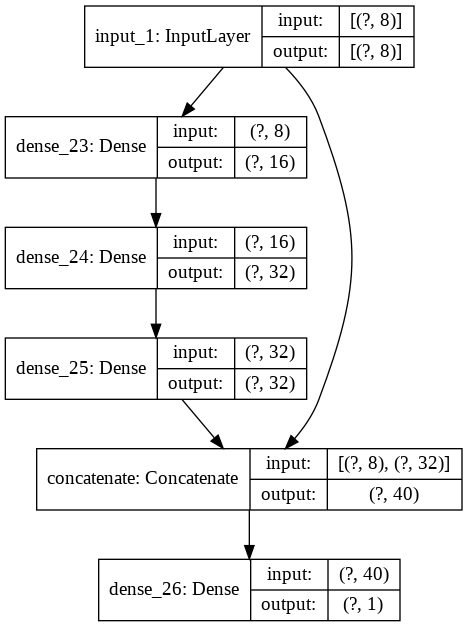

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
history = model.fit(X_train_scaled, y_train, 
                    epochs=30,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/30
407/407 [==============================] - 1s 2ms/step - loss: 2.4045 - val_loss: 0.7922
Epoch 2/30
407/407 [==============================] - 1s 2ms/step - loss: 0.7079 - val_loss: 0.6603
Epoch 3/30
407/407 [==============================] - 1s 2ms/step - loss: 0.6424 - val_loss: 0.6243
Epoch 4/30
407/407 [==============================] - 1s 2ms/step - loss: 0.6112 - val_loss: 0.6006
Epoch 5/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5875 - val_loss: 0.5798
Epoch 6/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5678 - val_loss: 0.5647
Epoch 7/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5523 - val_loss: 0.5509
Epoch 8/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5387 - val_loss: 0.5397
Epoch 9/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5271 - val_loss: 0.5295
Epoch 10/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5173 - val_loss: 0.5218

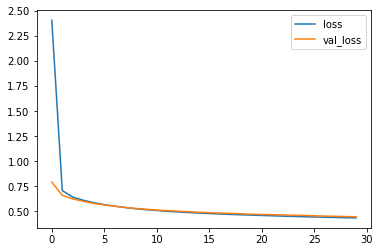

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line')

In [ ]:
predictions = model.predict(X_test_scaled)
print('R2:', r2_score(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))

R2: 0.6656533177672821
MSE: 0.438843430344939


## 5.2 Build, Train & Test a Wide & Deep NN with Subclassing API

After the Sequential API and the Functional API, let's try the Subclassing API:
* Create a subclass of the `tf.keras.models.Model` class.
* Create all the layers you need in the constructor (e.g., `self.hidden1 = tf.keras.layers.Dense(...)`).
* Use the layers to process the `input` in the `call()` method, and return the output.
* Note that you do not need to create a `tf.keras.layers.Input` in this case.
* Also note that `self.output` is used by Keras, so you should use another name for the output layer (e.g., `self.output_layer`).

**When should you use the Subclassing API?**
* Both the Sequential API and the Functional API are declarative: you first declare the list of layers you need and how they are connected, and only then can you feed your model with actual data. The models that these APIs build are just static graphs of layers. This has many advantages (easy inspection, debugging, saving, loading, sharing, etc.), and they cover the vast majority of use cases

* If you need to build a very dynamic model (e.g., with loops or conditional branching), or if you want to experiment with new ideas using an imperative programming style, then the Subclassing API is for you. You can pretty much do any computation you want in the `call()` method, possibly with loops and conditions, using Keras layers of even low-level TensorFlow operations.

* However, this extra flexibility comes at the cost of less transparency. Since the model is defined within the `call()` method, Keras cannot fully inspect it. All it sees is the list of model attributes (which include the layers you define in the constructor), so when you display the model summary you just see a list of unconnected layers. Consequently, you cannot save or load the model without writing extra code. So this API is best used only when you really need the extra flexibility.

In [ ]:
class MyRegressionModel(tf.keras.models.Model):

    def __init__(self):
        super(MyRegressionModel, self).__init__()
        self.hidden1 = tf.keras.layers.Dense(16, activation="relu")
        self.hidden2 = tf.keras.layers.Dense(32, activation="relu")
        self.hidden3 = tf.keras.layers.Dense(32, activation="relu")
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, input):
        x = self.hidden1(input)
        x = self.hidden2(x)
        x = self.hidden3(x)
        concat = tf.keras.layers.concatenate([input, x])
        output = self.output_layer(concat)
        return output

In [ ]:
model = MyRegressionModel()
model.compile(loss="mean_squared_error", 
              optimizer=tf.keras.optimizers.SGD(1e-3))

In [ ]:
history = model.fit(X_train_scaled, y_train, 
                    epochs=30,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/30
407/407 [==============================] - 1s 2ms/step - loss: 1.7095 - val_loss: 0.8031
Epoch 2/30
407/407 [==============================] - 1s 2ms/step - loss: 0.7786 - val_loss: 0.6947
Epoch 3/30
407/407 [==============================] - 1s 2ms/step - loss: 0.6866 - val_loss: 0.6500
Epoch 4/30
407/407 [==============================] - 1s 2ms/step - loss: 0.6444 - val_loss: 0.6170
Epoch 5/30
407/407 [==============================] - 1s 2ms/step - loss: 0.6156 - val_loss: 0.5920
Epoch 6/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5931 - val_loss: 0.5757
Epoch 7/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5772 - val_loss: 0.5623
Epoch 8/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5612 - val_loss: 0.5504
Epoch 9/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5500 - val_loss: 0.5432
Epoch 10/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5403 - val_loss: 0.5349

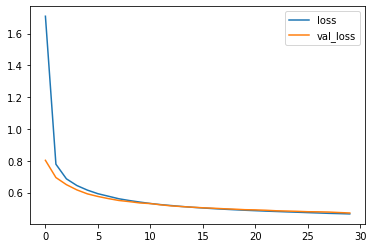

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line')

In [ ]:
predictions = model.predict(X_test_scaled)
print('R2:', r2_score(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))

R2: 0.6474512594797042
MSE: 0.4627343618921509


In [ ]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45


## 7.3: Build, Train & Test Wide & Deep Model with feature subsets
Now suppose you want to send only features 0 to 3 directly to the output, and only features 4 to 7 through the hidden layers, as shown on the following diagram. Use the functional API to build, train and evaluate this model.

**Tips**:
* You need to create two `tf.keras.layers.Input` (`input_A` and `input_B`)
* Build the model using the functional API, as above, but when you build the `tf.keras.models.Model`, remember to set `inputs=[input_A, input_B]`
* When calling `fit()`, `evaluate()` and  `predict()`, instead of passing `X_train_scaled`, pass `(X_train_scaled_A, X_train_scaled_B)` (two NumPy arrays containing only the appropriate features copied from `X_train_scaled`).

![](https://i.imgur.com/dFkDs1W.png)

In [ ]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45


In [ ]:
input_A = tf.keras.layers.Input(shape=[4])

input_B = tf.keras.layers.Input(shape=[4])
x = tf.keras.layers.Dense(16, activation="relu")(input_B)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)


concat = tf.keras.layers.concatenate([input_A, x])

output = tf.keras.layers.Dense(1)(concat)

In [ ]:
model = tf.keras.models.Model(inputs=[input_A, input_B], outputs=[output])
model.compile(loss="mean_squared_error", 
              optimizer=tf.keras.optimizers.SGD(1e-3))
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense_31 (Dense)                (None, 16)           80          input_3[0][0]                    
__________________________________________________________________________________________________
dense_32 (Dense)                (None, 32)           544         dense_31[0][0]                   
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 4)]          0                                            
_______________________________________________________________________________________

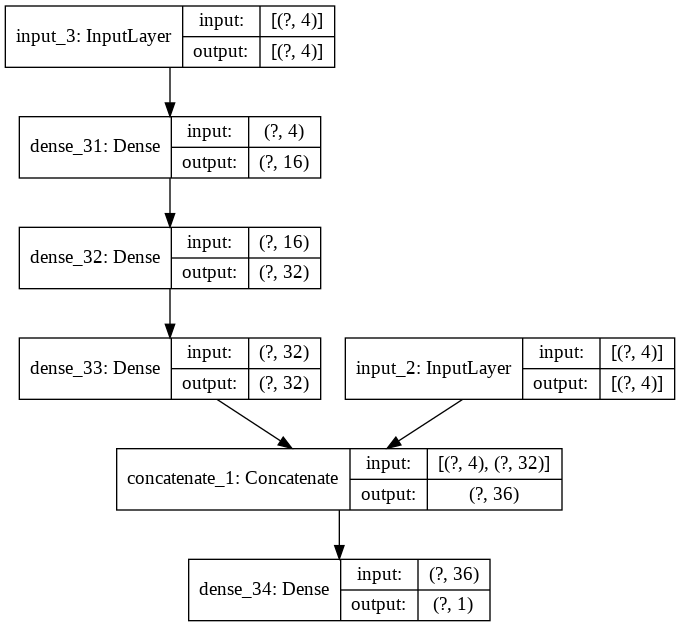

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
X_train_scaled_A = X_train_scaled[:, :4]
X_train_scaled_B = X_train_scaled[:, 4:]

X_test_scaled_A = X_test_scaled[:, :4]
X_test_scaled_B = X_test_scaled[:, 4:]

In [ ]:
X_train_scaled_A.shape, X_train_scaled_B.shape

((14448, 4), (14448, 4))

In [ ]:
history = model.fit([X_train_scaled_A, 
                     X_train_scaled_B], y_train, 
                    epochs=30,
                    ba
                    validation_split=0.1)

Epoch 1/30
407/407 [==============================] - 1s 3ms/step - loss: 2.0971 - val_loss: 0.8004
Epoch 2/30
407/407 [==============================] - 1s 2ms/step - loss: 0.7077 - val_loss: 0.6807
Epoch 3/30
407/407 [==============================] - 1s 2ms/step - loss: 0.6300 - val_loss: 0.6332
Epoch 4/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5937 - val_loss: 0.6050
Epoch 5/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5704 - val_loss: 0.5854
Epoch 6/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5521 - val_loss: 0.5691
Epoch 7/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5373 - val_loss: 0.5565
Epoch 8/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5250 - val_loss: 0.5458
Epoch 9/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5148 - val_loss: 0.5365
Epoch 10/30
407/407 [==============================] - 1s 2ms/step - loss: 0.5058 - val_loss: 0.5301

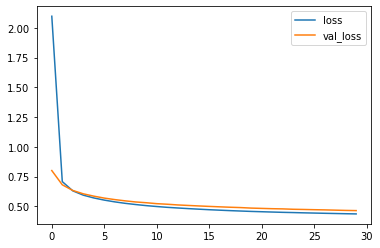

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line')

In [ ]:
predictions = model.predict([X_test_scaled_A, 
                             X_test_scaled_B])
print('R2:', r2_score(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))

R2: 0.6663551247588422
MSE: 0.4379222805205722
